> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Medical Appointments in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Problem Statement**: I have chosen the dataset containing the medical appointment data of around 100k patients, it contains several 
columns like patientId, appointmentId, gender, shedule day, appointment day, scholarship, noshow etc, so here by looking at the dataset we
can tell that the dependent variable here is no show which is a categorical variable with values as "Yes" or "No", by analysing other
independent variables we can intepret what factors are responsible for a patient to not show up for an appointement or show up for an
appointment, and also we can build a classification model which can predict for a new patient if that person would show up for an appointment
or not

In [24]:
# Use this cell to set up import statements for all of the packages that you
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('hospital_appointments_brazil.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [9]:
#we can drop the columns patientId, appointmentId, sheduleDay, appointmentDay as we dont significantly require for a patient to show or not
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis = 1, inplace=True)

In [10]:
df.head()
#now we are ready to clean and analyse data

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [11]:
#lets see our data:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#now lets replace the unwanted data in our data frame
df.replace("?", np.nan,inplace=True)

In [14]:
#lets identify the missing data:
missing_data = df.isnull()
missing_data.head(5)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [15]:
#True stands for there is missing values and false stands for there is no missing values
#now lets count the missing values in each column
for column in df.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Gender
False    110527
Name: Gender, dtype: int64

Age
False    110527
Name: Age, dtype: int64

Neighbourhood
False    110527
Name: Neighbourhood, dtype: int64

Scholarship
False    110527
Name: Scholarship, dtype: int64

Hipertension
False    110527
Name: Hipertension, dtype: int64

Diabetes
False    110527
Name: Diabetes, dtype: int64

Alcoholism
False    110527
Name: Alcoholism, dtype: int64

Handcap
False    110527
Name: Handcap, dtype: int64

SMS_received
False    110527
Name: SMS_received, dtype: int64

No-show
False    110527
Name: No-show, dtype: int64



In [21]:
#lets check if there is any nan values in the columns
nan_values = df.isna()
for column in df.columns.values.tolist():
    print(column)
    print(nan_values[column].value_counts())
    print("")

Gender
False    110527
Name: Gender, dtype: int64

Age
False    110527
Name: Age, dtype: int64

Neighbourhood
False    110527
Name: Neighbourhood, dtype: int64

Scholarship
False    110527
Name: Scholarship, dtype: int64

Hipertension
False    110527
Name: Hipertension, dtype: int64

Diabetes
False    110527
Name: Diabetes, dtype: int64

Alcoholism
False    110527
Name: Alcoholism, dtype: int64

Handcap
False    110527
Name: Handcap, dtype: int64

SMS_received
False    110527
Name: SMS_received, dtype: int64

No-show
False    110527
Name: No-show, dtype: int64



In [25]:
#so in the above summary we see that there are now nan values in the variables so we convert the noshow column to dummy variables and then
# proceed with the investiation
df['noshow'] = LabelEncoder().fit_transform(df['No-show'])

In [27]:
df.drop(['No-show'], axis = 1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Lets see the counts of no show for independent variables)

In [53]:
#lets first check for the sms_recieved variable
#lets see how the sms_recieved variable affects the noshow, lets see the "false" values for noshow for the person who recieved the texts and 
#the persons who did not recieved the text
df_sms = pd.DataFrame(df[df['noshow']==1]['SMS_received'].value_counts())

In [62]:
df_sms.rename(columns={'SMS_received' : 'no_patients_did_not_appear'}, inplace=True)
df_sms['sms_recieved'] = df_sms.index
df_sms.set_index('sms_recieved')

,no_patients_did_not_appear
sms_recieved,
0,12535
1,9784


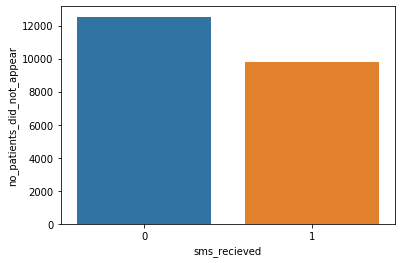

In [66]:
#visualisation
sns.barplot(x = 'sms_recieved', y = 'no_patients_did_not_appear',data = df_sms)
#we can see in the below plot that the people who didnt recieve the sms have a greater percentage of not going for the appointment

### Research Question 2  (Lets see for other attributes)

### Lets consider the schloarship


In [70]:
df['noshow'].value_counts()
#lets see the number of patients who come for the appointments as who have a schloarship or not
print(df[df['noshow']==1]['Scholarship'].value_counts())
df_Scholarship = pd.DataFrame(df[df['noshow']==1]['Scholarship'].value_counts())
df_Scholarship.rename(columns={'Scholarship' : 'no_patients_did_not_appear'}, inplace=True)
df_Scholarship['Scholarship'] = df_Scholarship.index
df_Scholarship.set_index('Scholarship')

0    19741
1     2578
Name: Scholarship, dtype: int64


,no_patients_did_not_appear
Scholarship,
0,19741
1,2578


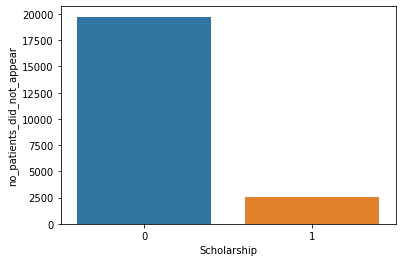

In [72]:
sns.barplot(x = 'Scholarship', y = 'no_patients_did_not_appear',data = df_Scholarship)
#we can clearly see that the people who dont have schloarship are more likey to not come for the appointment

### Lets consider the hipertension and diabetes columns:

In [79]:
df['Hipertension'].value_counts()
print(df[df['noshow']==1]['Hipertension'].value_counts())
df_Hipertension = pd.DataFrame(df[df['noshow']==1]['Hipertension'].value_counts())
df_Hipertension.rename(columns={'Hipertension' : 'no_patients_did_not_appear'}, inplace=True)
df_Hipertension['Hipertension'] = df_Hipertension.index
df_Hipertension.set_index('Hipertension')

0    18547
1     3772
Name: Hipertension, dtype: int64


,no_patients_did_not_appear
Hipertension,
0,18547
1,3772


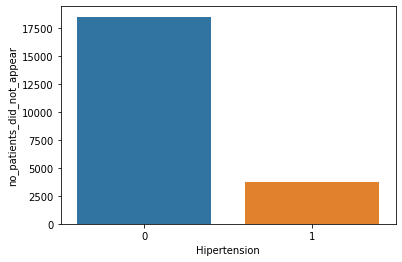

In [80]:
sns.barplot(x = 'Hipertension', y = 'no_patients_did_not_appear',data = df_Hipertension)
#this following plot shows that people having no hypertension are more likely not to come to appointments

In [81]:
df['Diabetes'].value_counts()
print(df[df['noshow']==1]['Diabetes'].value_counts())
df_Diabetes = pd.DataFrame(df[df['noshow']==1]['Diabetes'].value_counts())
df_Diabetes.rename(columns={'Diabetes' : 'no_patients_did_not_appear'}, inplace=True)
df_Diabetes['Diabetes'] = df_Hipertension.index
df_Diabetes.set_index('Diabetes')

0    20889
1     1430
Name: Diabetes, dtype: int64


,no_patients_did_not_appear
Diabetes,
0,20889
1,1430


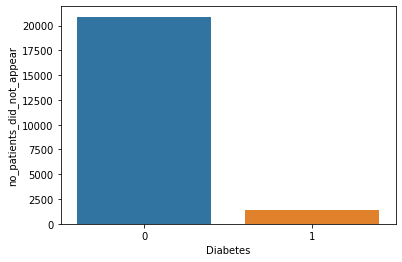

In [82]:
sns.barplot(x = 'Diabetes', y = 'no_patients_did_not_appear',data = df_Diabetes)
#here we can clearly see that the person without diabetes are more likely not to go to appointments

In [85]:
df_most_four_columns = df[['Diabetes', 'Hipertension', 'Scholarship', 'SMS_received','noshow']]
df_most_four_columns.corr()

,Diabetes,Hipertension,Scholarship,SMS_received,noshow
Diabetes,1.000000,0.433086,-0.024894,-0.014550,-0.015180
Hipertension,0.433086,1.000000,-0.019729,-0.006267,-0.035701
Scholarship,-0.024894,-0.019729,1.000000,0.001194,0.029135
SMS_received,-0.014550,-0.006267,0.001194,1.000000,0.126431
noshow,-0.015180,-0.035701,0.029135,0.126431,1.000000


In [89]:
df_group = df[df['noshow']==1][['Diabetes', 'Hipertension', 'Scholarship','noshow']]
df_group = df_group.groupby(['Diabetes', 'Hipertension', 'Scholarship']).count()
df_group

noshow
Diabetes Hipertension Scholarship        
0        0            0             16087
                      1              2171
         1            0              2347
                      1               284
1        0            0               254
                      1                35
         1            0              1053
                      1                88

### from the above grouped tables we can see that people who have do diabetes, no hipertension and no scholarship are more likely
### not to got for the appointment

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### In the Conclusion I want to say that:
### The best features for the classification model(Whether a person goes or not goes for the appointment) for this question will be:
### 1. Diabetes
### 2. Hipertension
### 3. Schloarship
### Apart from that sms_recieved also plays a good role in the problem, whether a person goes or not goes for an appointment